# What's Covered?

- How to subclass the `GeneralSimultaneousFitter` base class for fitting multiple 1D datas sharing some parameters with any new function
- Some of the benefits of fitting using a sublcass of `GeneralSimultaneousFitter`

**NOTE: This is much easier to do in an IDE like PyCharm or VSCode as it will prompt you for what to do next (and will automatically fill quite a lot for you)**

In [12]:
from dat_analysis.analysis_tools.general_fitting import GeneralSimultaneousFitter
from dat_analysis import Data
from dat_analysis.plotting.plotly.util import figures_to_subplots

import numpy as np
import lmfit as lm
import plotly.graph_objects as go

## Make some example data for fitting

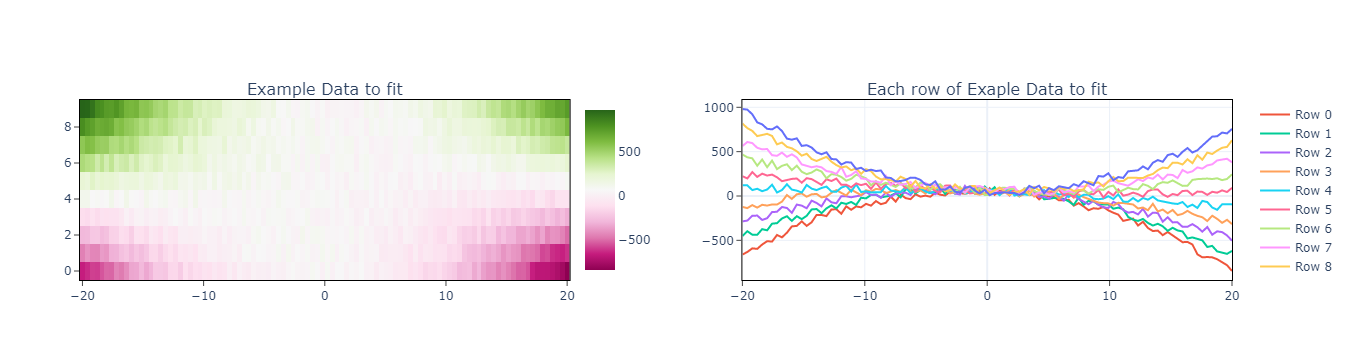

In [17]:
def func_to_fit(x, a, b, c):
    """Any function to fit (independent variable must be `x`)"""
    return a * x**2 + b * x + c


# Each row will have a different quadratic term
target_as = np.linspace(-2, 2, 10)
target_b, target_c = -5, 10

data = Data(x=np.linspace(-20, 20, 100), y=np.arange(len(target_as)))
data.data = np.array(
    [
        func_to_fit(data.x, target_a, target_b, target_c)
        + np.random.rand(data.x.shape[0]) * 100
        for target_a in target_as
    ]
)
data.plot_info.title = "Example Data to fit"

fig = go.Figure().update_layout(title="Each row of Exaple Data to fit")
for y, d in zip(data.y, data.data):
    fig.add_trace(go.Scatter(x=data.x, y=d, name=f"Row {y:d}"))
figures_to_subplots([data.plot(), fig])

## Make Fitter

Now let's look at how to make the Fitter subclass.

An easy way to remind yourself of what needs to be subclassed is to just try initializing the class like below. (If doing this in Pycharm or VSCode, you will be prompted to make any necessary methods automatically)

In [18]:
class TestFuncFitter(GeneralSimultaneousFitter):
    pass

# Attempting to use the class BEFORE we make the necessary methods
TestFuncFitter()

TypeError: Can't instantiate abstract class TestFuncFitter with abstract method fit_func

You can see that the error tells us the methods we need to make (`fit_func`)

Note: You wouldn't have ot think about this in an IDE, or in a notebook, you'd usually just implement the missing methods then re-run the cell, but I'll leave this one here for example purposes

In [31]:
class TestFuncSimultaneousFitter(GeneralSimultaneousFitter):
    def fit_func(self, x: np.ndarray, **param_kwargs):
        """This will be evaluated for each dataset when fitting"""
        return func_to_fit(x, **param_kwargs)

    def make_dataset_params(self, data: Data):
        """This should be something that makes a rough guess of starting parameters"""
        params = lm.Parameters()
        params.add_many(
            # param_name, value, vary, min, max, expr, brute_step (you don't have to specify all)
            ("a", -1, True, -1, 10),
            # Note: You can make guesses based on the data
            ("b", np.mean(data.x), True),
            ("c", np.mean(data.data), True),
        )
        return params


# Simultaneous fitter expects a list of 1D Datas, so let's make that first
datas_1d = [data[i] for i in range(len(data.y))]

fitter = TestFuncSimultaneousFitter(datas_1d)

# We would be able to do this if we passed in 1D FitResults (i.e. result of using a subclass of GeneralFitter)
# In general it is a good idea to use good starting values (i.e. from individual fits) for simultaenous fitting, so that's why only the def fit_func(...) is required.
# But if you did try to fit only passing in data, you'd get this error
try:
    fit = fitter.fit()
except NotImplementedError as e:
    print(f"Exception raised is: {e}")

Done, we can fit that data or any like it using `TestFuncSimultaneousFitter`

Note:
We wouldn't *need* to define a `make_dataset_params(...)` method to be able to do this fit if we passed in a list of 1D `FitResult` instead of `Data` (i.e. result of using a subclass of GeneralFitter) as it would use the params of thoses as the initial params.

In general, using good starting values (i.e. from individual fits) for simultaenous fitting is a good idea, so that's why only the def fit_func(...) is definitely required.

If you do try to fit only passing in `Data`s and you haven't defined `make_dataset_params` you would see this error:

```Either provide FitResults (which have params) or override make_dataset_params(...) to add a way to guess params from data```

### Looking at `fit`
Now let's look at what we can do with the `fit` that it returned

Note, typing `fit.` then pressing `<tab>`, you'll see a list of things you can do with the `fit` object.

In [32]:
print(type(fit))

<class 'dat_analysis.analysis_tools.general_fitting.SimultaneousFitResult'>


In [34]:
# We can just leave it at the end of a cell to see the fit parameters
# Also available at fit.params
fit

name,value,standard error,relative error,initial value,min,max,vary
a_0,-0.99999986,0.14261729,(14.26%),-1,-1.00000000,10.0000000,True
b_0,-4.40278076,0.45386994,(10.31%),-1.4210854715202004e-16,-inf,inf,True
c_0,-80.8057072,7.43727717,(9.20%),-216.83746360911024,-inf,inf,True
a_1,-0.99999998,0.01097244,(1.10%),-1,-1.00000000,10.0000000,True
b_1,-5.38665757,0.45351304,(8.42%),-1.4210854715202004e-16,-inf,inf,True
c_1,-14.6368454,7.95425299,(54.34%),-150.67654750844275,-inf,inf,True
a_2,-0.99999983,0.34852034,(34.85%),-1,-1.00000000,10.0000000,True
b_2,-5.22302659,0.45550779,(8.72%),-1.4210854715202004e-16,-inf,inf,True
c_2,44.2991414,6.24039680,(14.09%),-91.72852723254424,-inf,inf,True
a_3,-0.67045424,0.04346011,(6.48%),-1,-1.00000000,10.0000000,True


In [39]:
# Fit parameters for any specific row
fit.individual_params[3]  # 4th row

name,value,standard error,relative error,initial value,min,max,vary
c,54.8658563,7.93578764,(14.46%),54.86585625987167,-inf,inf,True
a,-0.67045424,0.04346011,(6.48%),-0.6704542443615387,-1.00000000,10.0000000,True
b,-5.08232844,0.45357524,(8.92%),-5.082328438342309,-inf,inf,True


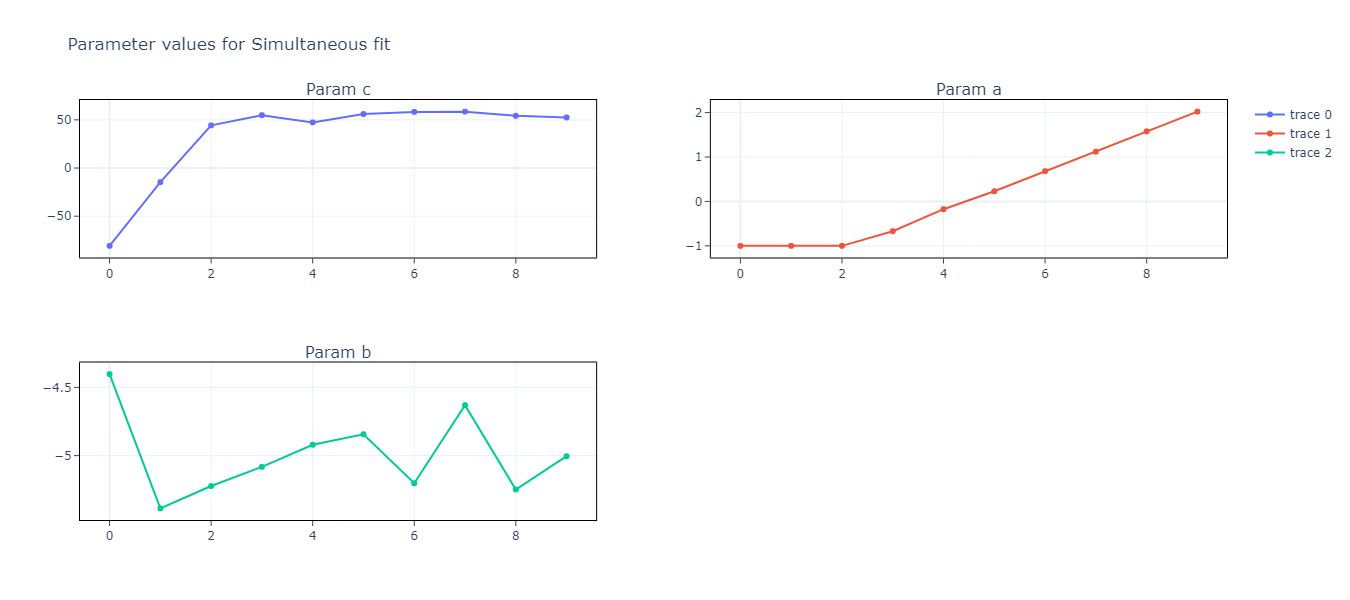

In [41]:
fit.plot()

We can see that by default all of the values were able to vary freely, and actually, the `a` parameter did not fit well for the first couple of rows of data due to the lower limit being set at `-1`.

Let's see how we can make this actually simultaneous below

## Additional things that can be done with Fitter

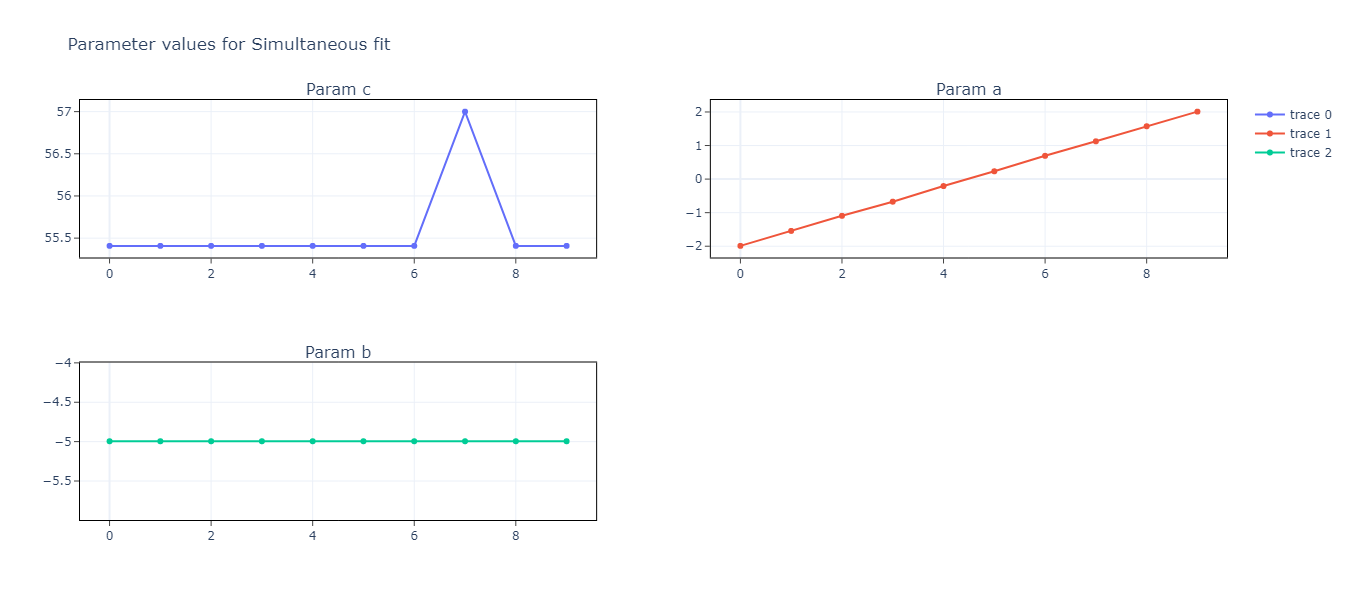

In [62]:
# Make param guesses so that they can be changed before fitting
params = fitter.make_params()

# Change the lower limit of `a`
params = fitter.update_all_param(params, "a", min=-5)

# Make `b` and `c` be shared parameters (this makes them all equal to the 0th)
params = fitter.make_param_shared(params, ["b", "c"])

# Individual params can also be changed
params["c_7"].expr = None  # Make it not shared with the rest
params["c_7"].value = 57  # different value
params["c_7"].vary = False  # Make it not vary so it stands out

# Do the fit with these params
new_fit = fitter.fit(params=params)
new_fit.plot()

In [58]:
new_fit.params

name,value,standard error,relative error,initial value,min,max,vary,expression
a_0,-1.99584796,0.01571895,(0.79%),-1,-5.00000000,10.0000000,True,
b_0,-4.99526137,0.07777894,(1.56%),-1.4210854715202004e-16,-inf,inf,True,
c_0,57.0000000,0.00000000,(0.00%),57,-inf,inf,False,
a_1,-1.55071635,0.01571765,(1.01%),-1,-5.00000000,10.0000000,True,
b_1,-4.99526137,0.07777894,(1.56%),-1.4210854715202004e-16,-inf,inf,False,b_0
c_1,57.0000000,0.00000000,(0.00%),57,-inf,inf,False,c_0
a_2,-1.10079021,0.01571846,(1.43%),-1,-5.00000000,10.0000000,True,
b_2,-4.99526137,0.07777894,(1.56%),-1.4210854715202004e-16,-inf,inf,False,b_0
c_2,57.0000000,0.00000000,(0.00%),57,-inf,inf,False,c_0
a_3,-0.67917290,0.01571966,(2.31%),-1,-5.00000000,10.0000000,True,
